# Benchmarking development frameworks


### TENSORFLOW AND KERAS API

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


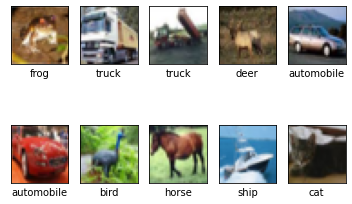

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 1.4370 - accuracy: 0.4922 - val_loss: 1.2296 - val_accuracy: 0.5706
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1721 - accuracy: 0.5901 - val_loss: 1.1169 - val_accuracy: 0.6052
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0430 - accuracy: 0.6350 - val_loss: 1.0289 - val_accuracy: 0.6443
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9508 - accuracy: 0.6688 - val_loss: 1.0049 - val_accuracy: 0.6522
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8801 - accuracy: 0.6927 - val_loss: 1.0265 - val_accuracy: 0.6547
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8146 - accuracy: 0.7180 - val_loss: 0.9605 - val_accuracy: 0.6757
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7666 - accuracy: 0.7321 - val_loss: 0.9771 - val_accuracy

313/313 - 1s - loss: 1.0829 - accuracy: 0.6636 - 716ms/epoch - 2ms/step


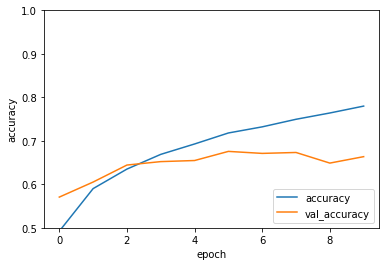

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### PYTORCH


In [ ]:
import torchvision 
import torch
import torchvision.transforms as transforms
import PIL

Define the dataset

In [ ]:
transform = transforms.Compose( 
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Define the network

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Define the loss function and the optimizer

In [ ]:
import torch.optim as optim 

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train the network

In [ ]:
epochs = 2

for epoch in range(epochs):
    running_loss = 0.0
    training_loss = []
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data 
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished training!')

[1,  2000] loss: 0.742
[1,  4000] loss: 0.777
[1,  6000] loss: 0.806
[1,  8000] loss: 0.833
[1, 10000] loss: 0.819
[1, 12000] loss: 0.830
[2,  2000] loss: 0.725
[2,  4000] loss: 0.763
[2,  6000] loss: 0.758
[2,  8000] loss: 0.768
[2, 10000] loss: 0.816
[2, 12000] loss: 0.833
Finished training!


Test the network on new data

GroundTruth:  cat   ship  ship  plane


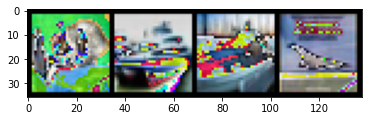

In [ ]:
from torchvision.utils import make_grid

dataiter = iter(testloader)
images, labels = next(dataiter)
grid = torchvision.utils.make_grid(images)
img = torchvision.transforms.ToPILImage()(grid)

print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

plt.imshow(img)
plt.show()

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   car   truck plane


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data 
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total}%')

Accuracy of the network on the 10000 test images: 57%


Predictions for each class

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f}%')

Accuracy for class: plane is 61.3%
Accuracy for class: car   is 64.2%
Accuracy for class: bird  is 56.0%
Accuracy for class: cat   is 41.4%
Accuracy for class: deer  is 33.5%
Accuracy for class: dog   is 33.8%
Accuracy for class: frog  is 76.9%
Accuracy for class: horse is 59.8%
Accuracy for class: ship  is 72.4%
Accuracy for class: truck is 73.7%


### MXNET


In [ ]:
!nvcc --version
!pip install mxnet-cu112
!pip install gluoncv

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 MB 3.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.0 MB/s eta 0:00:00


In [ ]:
from __future__ import division 

import argparse, time, logging, random, math
import numpy as np 
import mxnet as mx 

from mxnet import gluon, nd
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

from gluoncv.model_zoo import get_model
from gluoncv.utils import makedirs, TrainingHistory 
from gluoncv.data import transforms as gcv_transforms

/usr/local/lib/python3.8/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.13.1+cu116` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


Network structure

In [ ]:
num_gpus = 1
ctx = [mx.gpu(i) for i in range(num_gpus)]

net = get_model('cifar_resnet20_v1', classes=10)
net.initialize(mx.init.Xavier(), ctx=ctx)

In [ ]:
print(net)

CIFARResNetV1(
  (features): HybridSequential(
    (0): Conv2D(None -> 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
    (2): HybridSequential(
      (0): CIFARBasicBlockV1(
        (body): HybridSequential(
          (0): Conv2D(16 -> 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
          (2): Activation(relu)
          (3): Conv2D(16 -> 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=None)
        )
      )
      (1): CIFARBasicBlockV1(
        (body): HybridSequential(
          (0): Conv2D(16 -> 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm(ax

Data augmetation and Data Loader

In [ ]:
transform_train = transforms.Compose([
    gcv_transforms.RandomCrop(32, pad=4),
    transforms.RandomFlipLeftRight(),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

In [ ]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

In [ ]:
per_device_batch_size = 128
num_workers = 8
batch_size = per_device_batch_size * num_gpus

train_data = gluon.data.DataLoader(
    gluon.data.vision.CIFAR10(train=True).transform_first(transform_train),
    batch_size=batch_size, shuffle=True, last_batch='discard', num_workers=num_workers
)

val_data = gluon.data.DataLoader(
    gluon.data.vision.CIFAR10(train=False).transform_first(transform_test),
    batch_size=batch_size, shuffle=False, num_workers=num_workers
)

Optimizer, Loss and Metric

In [ ]:
lr_decay = 0.1
lr_decay_epoch = [80, 160, np.inf]

optimizer = 'nag'
optimizer_params = {'learning_rate': 0.1, 'wd': 0.0001, 'momentum': 0.9}

trainer = gluon.Trainer(net.collect_params(), optimizer, optimizer_params)

In [ ]:
loss_fn = gluon.loss.SoftmaxCrossEntropyLoss()

In [ ]:
train_metric = mx.metric.Accuracy()
train_history = TrainingHistory(['training-error', 'validation-error'])

Validation

In [ ]:
def test(ctx, val_data):
    metric = mx.metric.Accuracy()
    for i, batch in enumerate(val_data):
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0)
        outputs = [net(X) for X in data]
        metric.update(label, outputs)
    
    return metric.get()

Training

[Epoch 0] train=0.754367 val=0.743100 loss=35236.419491 time: 42.968906
[Epoch 1] train=0.783874 val=0.711600 loss=30982.201370 time: 45.213238
[Epoch 2] train=0.806290 val=0.729600 loss=28118.930710 time: 42.688598


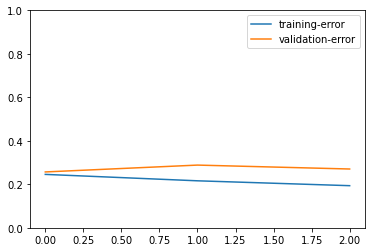

In [ ]:
epochs = 3
lr_decay_count = 0

for epoch in range(epochs):
    tic = time.time()
    train_metric.reset()
    train_loss = 0

    if epoch == lr_decay_epoch[lr_decay_count]:
        trainer.set_learning_rate(trainer.learning_rate*lr_decay)
        lr_decay_count += 1
    
    for i, batch in enumerate(train_data):
        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0)
        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0)


        with ag.record():
            output = [net(X) for X in data]
            loss = [loss_fn(yhat, y) for yhat, y in zip(output, label)]

        
        for l in loss:
            l.backward()

        trainer.step(batch_size)

        train_loss += sum([l.sum().asscalar() for l in loss])
        train_metric.update(label, output)
    
    name, acc = train_metric.get()
    name, val_acc = test(ctx, val_data)

    train_history.update([1-acc, 1-val_acc])
    print('[Epoch %d] train=%f val=%f loss=%f time: %f' %
        (epoch, acc, val_acc, train_loss, time.time()-tic))


train_history.plot()



If we wanted to create our own neural network instead of using one already existing we can do something like this: 

In [ ]:
class LeNet(nn.Block):
   def __init__(self):
       super().__init__()
       self.conv1 = nn.Conv2D(channels=6, kernel_size=3, activation='relu')
       self.pool1 = nn.MaxPool2D(pool_size=2, strides=2)
       self.conv2 = nn.Conv2D(channels=16, kernel_size=3, activation='relu')
       self.pool2 = nn.MaxPool2D(pool_size=2, strides=2)
       self.dense1 = nn.Dense(120, activation="relu")
       self.dense2 = nn.Dense(84, activation="relu")
       self.dense3 = nn.Dense(10)
   def forward(self, x):
       x = self.conv1(x)
       x = self.pool1(x)
       x = self.conv2(x)
       x = self.pool2(x)
       x = self.dense1(x)
       x = self.dense2(x)
       x = self.dense3(x)
       return x

lenet = LeNet()

# CONCLUSIONS

- TENSORFLOW AND KERAS:
    In my opinion is the most accessible, the definition of the model is intuitive and clear and also the training and visualization of the results.
    But, on the other hand, the fact that it's all "done" leave the user with some not-so-easy accessible black box, that makes the full understanding of the process not so easy for amateurs.

- PYTORCH:
    In this case we leave behind some clarity and semplicity to create space for some "reasoning". In pytorch, in fact, we must not only define the model (very similar as in keras), but we also have to implement the forward pass, the training loop and the evaluation loop.

- MXNET:
    I found this framework to be a "fusion" of the previous two, it has a good union between complexity and understandability of all the process.


Note that all this examples are made with the standard documentation of each freamwork for CIFAR10 classification, so, in some cases (like the mxnet one), i used an already existing model (cifar_resnet20_v1) instead of creating a brand new one.